# Laboratorio 6: Analítica de redes sociales
## Autores
- Saúl Contreras 18409
- Andrea Elías 17048
- Diego Estrada 18540
- Juan Fernando De Leon Quezada 17822

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Modulos

In [2]:
!pip install emoji
import tweepy
import csv
import pandas as pd
import string
import re
import emoji

     |████████████████████████████████| 184 kB 2.6 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=7f590622956826ae48aafb21b8ca0d6f026235fe71ec5941c569e1927cb5e2e9
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


---
## Prueba del API de Twitter con llaves de perfil de desarrollador


In [3]:
# Twitter Developer Account Credentials
consumer_key = 'AkdjcfXtdiSRYaH0LWlunSy5r'
consumer_secret = 'XjmB5ZGTqCvT64pcgG4wAWMQ3UuLusL9dgck1AHFLk2yQp0Hbj'
access_token = '1384276708388347920-UCeP00NSbBklszHcZDKHJyhQYrbA65'
access_token_secret = 'hFdx01IzkhH5iCTZ3jLUfqiQGpIhWDTjhHiJrBN4pj4Bv'

# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth, wait_on_rate_limit=True)

auth

public_tweets = api.home_timeline()

for tweet in public_tweets:
    print (tweet.text)


RT @LuckReserve: Our boys weekend is coming to an end, It's time for them to get back on that grind.. You run into their lobby what are you…
RT @httpmayav: I like big butts, and I cannot lie.
RT @YerisTR: My #GDC21 talk  about authorial voice in system design is now available for free in the vault, so if you want to check it out,…
RT @claudia_reginam: Que emoción el bicentenario de Bananaland https://t.co/5YeCyLB0YX
RT @victoriacana: Moving forward, I am taking control of my own narrative. I am not just lucky. I am not just some nice, helper girl who mi…
RT @Kuroudee: I mentored during the Code Coven summer program these last few months and it was extremely rewarding. 

Please share this for…
RT @LuckReserve: What is your name without these letters? 🤔 https://t.co/XApbPAWYPO
RT @drjclau: I did a guest talk for Code Coven last year and the cohort was filled with bright, lovely people excited about making games! I…
RT @someawesomeguys: ✨amazing opportunity alert✨
RT @lifewithayden: Can w

- - -
## Descripción del problema
_Extraiga los datos relacionados con el coviden Guatemala, puede utilizar cualquier red social, a la que  se  tenga  acceso,  y  pueden  extraerse  datos  de  varias.  Por  ejemplo  si  extrae  datos  de  twitter podría utilizar el hashtag #COVID19gt o #CoronavirusGT. Explore los datos que extraiga y descubra conocimiento, tendencias y elementos interesantes._



### Extracción de datos

In [4]:
#Se crea el archivo csv, si ya existe, se escribe en él.
file = open('twitter_covid_gt.csv', 'a')

writer = csv.writer(file)
hashtags = ('#COVID19gt OR #CoronavirusGT OR #CuarentenaTotal OR #GuatemalaNoSeDetiene OR #Guatemala#COVID19 OR #CoronavirusGuatemala OR #QuedateEnCasaGT OR #COVID_19gt OR #Covid19gt OR #ToqueDeQuedaGT OR #PandemiaGT OR #DatosCovidGT OR #YoMeQuedoEnMiCasa OR #JuntosSaldremosAdelante')
for tweet in tweepy.Cursor(api.user_timeline,id='GuatemalaGob', lang="es").items():
    temporal = tweet.text
    #Limpieza de caracteres especiales
    temporal = temporal.replace('á', 'a')
    temporal = temporal.replace('é', 'e')
    temporal = temporal.replace('í', 'i')
    temporal = temporal.replace('ó', 'o')
    temporal = temporal.replace('ú', 'u')
    temporal = temporal.replace('Á', 'A')
    temporal = temporal.replace('É', 'E')
    temporal = temporal.replace('Í', 'I')
    temporal = temporal.replace('Ó', 'O')
    temporal = temporal.replace('Ú', 'U')
    temporal = temporal.replace('ñ', 'n')
    temporal = temporal.replace('Ñ', 'N')
    temporal = temporal.replace('Ü', 'U')
    temporal = temporal.replace('ü', 'u')
    writer.writerow([tweet.created_at, temporal.encode('utf-8')])

### Carga de datos

In [ ]:
data = pd.read_csv('/content/twitter_covid_gt.csv')
data.columns = ["Date", "Tweet"]
len(data.columns)


2

### Limpieza y preprocesamiento

Se crean funciones para eliminar signos de puntuación, url's y números, pues no aportan valor al análisis que se quiere hacer.

In [ ]:
def remove_characters(text):
  '''Remove all signs from a string'''
  return text.translate(text.maketrans('', '', string.punctuation))

def remove_url(text):
  '''Remove url from a string'''
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def remove_num(text):
  '''Remove num'''
    return re.sub('^\d+\s|\s\d+\s|\s\d+$','',text)

Insalación de librería emoji

In [ ]:
!pip install emoji

In [ ]:
# Se quitan vacíos
data = data.dropna(subset=['Tweet'])

# Lowercasing
data['Tweet'] = data['Tweet'].apply(lambda line: str(line).lower())

# Se quitan signos de puntuación
data['Tweet'] = data['Tweet'].apply(lambda line: remove_characters(str(line)))

# Se quitan enlaces URL
data['Tweet'] = data['Tweet'].apply(lambda line: remove_url(str(line)))

# Se quitan los emojis
data['Tweet'] = data['Tweet'].apply(lambda line: emoji.demojize(str(line)))

# Se quitan números
data['Tweet'] = data['Tweet'].apply(lambda line: remove_num(str(line)))

A continuación se elminan las stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords = set(stopwords.words('spanish'))
expresiones = ['el','los','las','la','de','que','porque','de','por','lo','brt','object','deic',
               'bxc2xa1ojala','Name','bel','lenght','viern','dtype']
for i in expresiones:
    stopwords.add(i)
print(stopwords)

{'de', 'nos', 'hubieron', 'fuese', 'hayas', 'estuviese', 'teníais', 'tengas', 'vosotras', 'has', 'éramos', 'deic', 'serán', 'habrá', 'tuvieses', 'brt', 'habiendo', 'nuestros', 'estuvimos', 'qué', 'hubiésemos', 'habrían', 'habéis', 'seas', 'dtype', 'sería', 'tenidos', 'estás', 'tenida', 'como', 'tienes', 'otra', 'fuera', 'habría', 'hubieses', 'sean', 'seré', 'fuerais', 'habré', 'y', 'la', 'habida', 'habido', 'esté', 'estarías', 'esos', 'tendrá', 'bel', 'tuviesen', 'les', 'estaría', 'suyo', 'tendríamos', 'esto', 'había', 'fui', 'nada', 'os', 'tengamos', 'ni', 'estuvieseis', 'estéis', 'estaremos', 'seréis', 'con', 'tendrán', 'sentid', 'estas', 'no', 'estuviste', 'eres', 'estáis', 'hasta', 'vuestros', 'nosotros', 'object', 'seremos', 'estuviera', 'tendremos', 'tanto', 'he', 'tenidas', 'o', 'mucho', 'sí', 'estábamos', 'contra', 'al', 'fuéramos', 'tendrías', 'una', 'tenían', 'mías', 'estamos', 'eras', 'estuviésemos', 'tendría', 'tuya', 'vosotros', 'tenías', 'fuiste', 'mía', 'quienes', 'estar

Se observan los primeros 10 twits en el dataset y efectivamente han pasado por la limpieza y preprocesamiento. Los datos están listos para el análisis y aplicación de algoritmos.

In [ ]:
data.head(10)

,Date,Tweet
0,2021-09-06 00:14:43,bejercito de guatemala incauta una tonelada de...
1,2021-09-05 02:52:22,bendirecto presidente drgiammattei participa ...
2,2021-09-05 02:14:40,bendirecto presidente drgiammattei participa ...
3,2021-09-05 02:06:39,bendirecto vecinos de martires del pueblo son...
4,2021-09-05 01:49:46,bcontinua la jornada movil de vacunacion en el...
5,2021-09-05 01:07:39,brt scspgt presidente drgiammattei esta vacuna...
6,2021-09-05 00:34:46,bendirecto declaraciones del presidente drgia...
7,2021-09-05 00:10:14,bendirecto declaraciones del presidente drgia...
8,2021-09-04 23:23:35,bendirecto presidente drgiammattei supervisa ...
9,2021-09-04 18:01:38,bendirecto el plan de vacunacion contra el co...


### Análisis exploratorio

Con el fin de ver de manera más atractiva las palabras más frecuentes en el conjunto de datos, se realiza una nube de palabras. Se observa que las más frecuentes son: drgiammatei, presidente, participa, en directo, vacuna, jornada, en vivo, entre otras.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

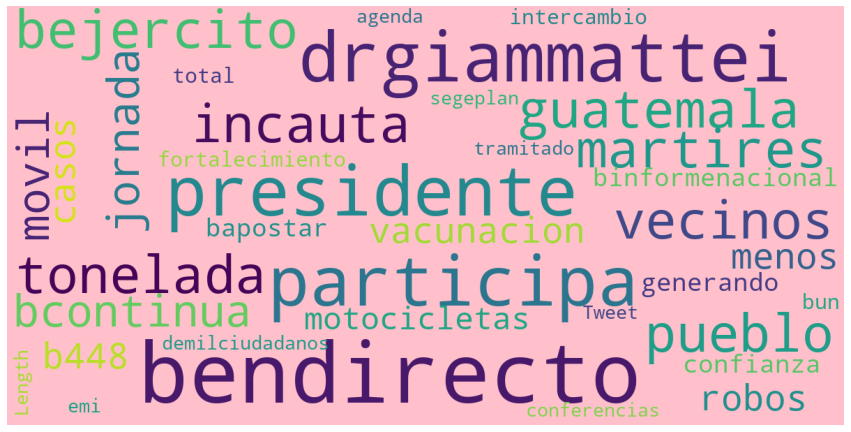

In [ ]:
wordcloud = WordCloud(
        background_color='pink',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data['Tweet']))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

También se utiliza la librería Counter para obtener la suma de las palabras más frecuentes en los twits del conjunto de datos.

In [ ]:
from collections import Counter

In [ ]:
tweet_count = Counter()

In [ ]:
splitted_tweets = []
for tweet in data['Tweet']:
    word_list = []
    for word in tweet.split():
        if word not in stopwords:
            word_list.append(word)
    splitted_tweets.append(' '.join(word_list))

In [ ]:
for tweet in splitted_tweets:
    tweet_count.update(word.strip('.,?!"').lower() for word in tweet.split())

Justo como se observó en la nube de palabras, *drgiammatei*, haciendo referencia al presidente de Guatamala, es la palabra más frecuente. Seguido de ella se encuentra *presidente, guatemala, endirecto, mas, gobierno, nacional y covid19*.

In [ ]:
tweet_count.most_common(20)

[('drgiammattei', 1120),
 ('presidente', 873),
 ('guatemala', 795),
 ('gobierno', 565),
 ('nacional', 503),
 ('benvivo', 497),
 ('mas', 443),
 ('bendirecto', 439),
 ('binformenacional', 381),
 ('covid19', 362),
 ('minecogt', 259),
 ('minsaludguate', 227),
 ('informe', 209),
 ('vacunacion', 208),
 ('hoy', 192),
 ('pais', 186),
 ('participa', 184),
 ('apoyo', 184),
 ('bla', 182),
 ('dia', 180)]

A continuación se realiza una gráfica de barras para verlo de otra forma.

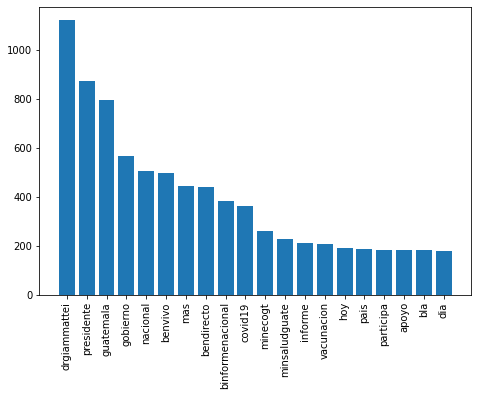

In [ ]:
datos_tweet = tweet_count.most_common(20)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.title('Frecuencia de palabras mas comunes')
plt.show()

Al realizar la grafica de barras con frecuencias de las plabras encontradas se logro determinar que el ministerio de economia es uno de los mas mencionados, por lo cual se puede inferir que esto es debido a las fluctuaciones economicas que el covid-19 ha causado en el pais.

# Valor sentimental

In [ ]:
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [ ]:
emotions = []
for tweet in data['Tweet']:
  value = 0
  for word in str(tweet).split(' '):
    x = lexicon.loc[lexicon['termino'] == word]
    if (len(x)>0):
      value += x.sentimiento.iloc[0]
  emotions.append(value)

In [ ]:
data = data.assign(positivity_value=emotions)

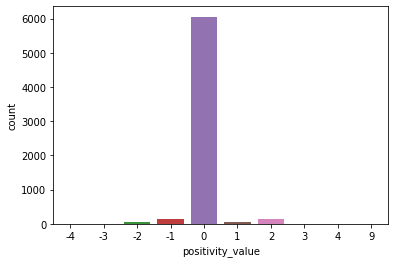

In [ ]:
import seaborn as sns
ax = sns.countplot(x="positivity_value",data=data)

In [ ]:
positivity_count = pd.value_counts(data.positivity_value).to_frame().reset_index()
positivity_count

,index,positivity_value
0,0,6054
1,-1,144
2,2,144
3,1,60
4,-2,52
5,-3,10
6,3,6
7,4,4
8,9,2
9,-4,2


##**Descubrimiento de información**

Basandonos en los hallazgos, se pudo observar que las palabras mas frecuentes dentro de los tweets son; Dr Giammatei, presidente, Guatemala, gobierno, nacional, en vivo, en directo, informe nacional, covid19, ministerio de economia, etc.<br>


Estas palabras al analizarlas, podemos darnos cuenta de que son aspectos importantes durante la problematica actual. En cuanto a "Dr. Giammatei" es logico que esta aparexca ya que es el presidente de Guatemala. Podemos inferir que los tweets mencionandolo son debido a las distintas restricciones y medidas que ha tenido que imponwe con respecto a la pandemia.<br>


Otro topico importante, el cual se ve reflejado dentro de las palabras mas frecuentes es informe nacional, en directo y en vivo, esto debido a los boletines informarivos que son realizados por el presidente en directo basado en los informes nacionales. Asociado a esto, podemos tambien mencionar las palabras; informe, gobierno, nacional.<br>


Por otro lado, las palabras minecogt y minsaludguate, las cuales hacen referencia al Ministerio de Economia y al Ministerio de Salud, son de las mas frecuentes, ya que el covid-19, tiene incidencias en ambos. El ministerio de salud debido que con la situación ellos han sido los más involucrados en el país en el manejo de la situación del COVID-19, debido que ellos son los que han mantenido a todos los enfermos en cuarentena y hecho la distribución de presupuesto, y esto ha traído comentarios tanto positivos como negativos, por lo cual son un tema lógico de ser mencionados en muchas ocasiones por las personas.<br>

Se puede observar que los sentimientos entre todos los tweets tienen una frecuencia mayoritaria a los tweets neutros. Esto se puede observar en la tabla de frecuencia y en el diagrama de barras de la variable positivity_count. También se puede ver como los tweets neutros sobrepasan en gran manera en cantidad al resto de los tweents, sin embargo se obser va tweets positivos de 9 puntos y tweets negativos de hasta -4. 
